# BibRec: Training Random Forest Model
This Notebook showcases the prediction of book ratings using the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) from [scikit-learn](https://scikit-learn.org/stable/index.html)

In [1]:
n_estimators=50
n_jobs=3
test_size=0.30
random_state=1
verbose=10

### Features used: Country, State, Age, Year-of-Publication, Publisher

In [2]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

books, users, ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                            users_path='data/normalized_users.csv',
                                            ratings_path='data/normalized_ratings.csv')

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:396: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(ratings_path, sep=",", encoding="utf-8", na_filter=False)


In [3]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,32.893940,nyc,new_york,usa,0.00,0.0
1,2,18.000000,stockton,california,usa,0.00,1.0
2,3,23.894738,moscow,other,other,0.00,0.0
3,4,17.000000,porto,other,portugal,0.00,0.0
4,5,34.774457,farnborough,other,united_kingdom,0.00,0.0
...,...,...,...,...,...,...,...
278853,278854,28.203240,portland,oregon,usa,5.25,8.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.00,0.0
278855,278856,40.689921,brampton,ontario,canada,0.00,0.0
278856,278857,34.861866,knoxville,other,usa,0.00,0.0


In [4]:
books

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,1.0,3
1,0002005018,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,4.928571,14.0,4
2,0060973129,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,5.000000,3.0,14
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,4.272727,11.0,6
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
270939,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,0525447644,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,1.0,1
270942,0192126040,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,1.0,9


In [5]:
ratings

,user_id,isbn,book_rating,isbn13,normalized_rating
0,276726,0155061224,5,9780155061224,-1.5
1,276729,052165615X,3,9780521656153,0.0
2,276729,0521795028,6,9780521795029,4.0
3,276744,038550120X,7,9780385501200,2.0
4,276747,0060517794,9,9780060517793,4.6
...,...,...,...,...,...
383957,276704,0743211383,7,9780743211383,
383958,276704,0806917695,5,9780806917696,
383959,276704,1563526298,9,9781563526299,
383960,276709,0515107662,10,9780515107661,


In [6]:
encoded_books = get_encoded_books("./data/encoded_books.csv")
encoded_users = get_encoded_users("./data/encoded_users.csv")

In [7]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
0,9780195153446,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9780002005012,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9780060973124,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9780374157067,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780393045215,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270940,978052544763,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270941,9780060086671,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270942,9780192126047,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_argentina,country_australia,country_austria,country_brazil,country_canada,country_china,country_france,country_germany,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,1,32.893940,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,23.894738,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,34.774457,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,28.203240,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
278854,278855,50.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278855,278856,40.689921,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
278856,278857,34.861866,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
df_ratings = ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,user_id,book_rating,isbn13
0,276726,5,9780155061224
1,276729,3,9780521656153
2,276729,6,9780521795029
3,276744,7,9780385501200
4,276747,9,9780060517793
...,...,...,...
383957,276704,7,9780743211383
383958,276704,5,9780806917696
383959,276704,9,9781563526299
383960,276709,10,9780515107661


In [10]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
df

,user_id,book_rating,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,276726,5,9780155061224,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,276729,3,9780521656153,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,276729,6,9780521795029,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,276744,7,9780385501200,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,276747,9,9780060517793,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383963,276704,7,9780743211383,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
383964,276704,5,9780806917696,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
383965,276704,9,9781563526299,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
383966,276709,10,9780515107661,9,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Data splitting
To measure performance of the model, the dataset is split into 70% of training data, and 30% of test data.
Precision & Recall are calculated, in order to compare it to the baseline.

In [11]:
# Features
X = df.drop(['user_id', 'book_rating'], axis=1)
X

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,9780155061224,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,9780521656153,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9780521795029,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9780385501200,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780060517793,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383963,9780743211383,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
383964,9780806917696,8,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
383965,9781563526299,5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
383966,9780515107661,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# Prediction
Y = df['book_rating']
Y

0          5
1          3
2          6
3          7
4          9
          ..
383963     7
383964     5
383965     9
383966    10
383967    10
Name: book_rating, Length: 383968, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

## Training the model

In [14]:
rfc = RandomForestClassifier(n_estimators=n_estimators, min_weight_fraction_leaf=0, n_jobs=n_jobs, random_state=random_state, verbose=verbose)

In [15]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.0s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.5s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.5s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    5.7s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    7.3s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   10.1s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   12.9s


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   16.4s


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   19.8s


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   24.0s


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   28.3s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   31.0s finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, verbose=10)

## Running Predictions

For each input, the model predicts a rating between 1 to 10.

In [16]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    3.3s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    4.1s finished


array([10,  8,  7, ...,  9,  8,  8])

## Evaluation
- The accuracy is the number of correctly predictions divided by the total number of predictions.
- Precision is the proportion of true positive predictions made by the model out of all positive predictions (TP / (TP + FP)).
- Recall is the proportion of true positive predictions made by the model out of all actual positive instances (TP / (TP + FN)).
- F1-score is the harmonic mean of precision and recall, and is often used as a single metric to summarize the model's performance (2 * (precision * recall) / (precision + recall)).

In [17]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           1       0.02      0.01      0.01       461
           2       0.02      0.01      0.02       688
           3       0.04      0.02      0.03      1575
           4       0.05      0.03      0.03      2283
           5       0.27      0.25      0.26     13446
           6       0.11      0.09      0.10      9471
           7       0.22      0.21      0.21     20172
           8       0.27      0.32      0.30     27540
           9       0.22      0.21      0.21     18258
          10       0.31      0.33      0.32     21297

    accuracy                           0.25    115191
   macro avg       0.15      0.15      0.15    115191
weighted avg       0.24      0.25      0.24    115191



In [18]:
print(accuracy_score(y_test, rfc_pred) * 100)

24.652099556388954


In [19]:
print("Prints Precision, Recall, FScore and support for each class")
pd.DataFrame(precision_recall_fscore_support(y_test, rfc_pred))

Prints Precision, Recall, FScore and support for each class


,0,1,2,3,4,5,6,7,8,9
0,0.020833,0.022500,0.035270,0.045387,0.271537,0.114165,0.215011,0.274523,0.217257,0.312806
1,0.010846,0.013081,0.021587,0.026719,0.246839,0.085947,0.214158,0.322041,0.211688,0.333427
2,0.014265,0.016544,0.026782,0.033637,0.258600,0.098066,0.214584,0.296389,0.214436,0.322787
3,461.000000,688.000000,1575.000000,2283.000000,13446.000000,9471.000000,20172.000000,27540.000000,18258.000000,21297.000000


In [20]:
print(rfc.score(X_train, y_train))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    5.4s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    6.3s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    7.5s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    8.6s


0.9024135249667941


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    9.3s finished


## Confusion Matrix
Visualizing Precision & Recall


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    3.7s finished


Confusion matrix, without normalization
[[   5    7   14    8   63   37   73   93   66   95]
 [  10    9   17   15   82   52  122  186   92  103]
 [   6   14   34   45  180   99  290  440  210  257]
 [  10   16   34   61  242  164  442  670  306  338]
 [  28   35  110  164 3319  873 2121 3194 1600 2002]
 [  13   45   86  134  961  814 1870 2776 1273 1499]
 [  42   75  198  245 1837 1462 4320 5963 2858 3172]
 [  57   98  205  278 2391 1612 5060 8869 4369 4601]
 [  36   54  133  182 1439 1008 2910 5098 3865 3533]
 [  33   47  133  212 1709 1009 2884 5018 3151 7101]]


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    3.6s finished


Normalized confusion matrix
[[0.01 0.02 0.03 0.02 0.14 0.08 0.16 0.2  0.14 0.21]
 [0.01 0.01 0.02 0.02 0.12 0.08 0.18 0.27 0.13 0.15]
 [0.   0.01 0.02 0.03 0.11 0.06 0.18 0.28 0.13 0.16]
 [0.   0.01 0.01 0.03 0.11 0.07 0.19 0.29 0.13 0.15]
 [0.   0.   0.01 0.01 0.25 0.06 0.16 0.24 0.12 0.15]
 [0.   0.   0.01 0.01 0.1  0.09 0.2  0.29 0.13 0.16]
 [0.   0.   0.01 0.01 0.09 0.07 0.21 0.3  0.14 0.16]
 [0.   0.   0.01 0.01 0.09 0.06 0.18 0.32 0.16 0.17]
 [0.   0.   0.01 0.01 0.08 0.06 0.16 0.28 0.21 0.19]
 [0.   0.   0.01 0.01 0.08 0.05 0.14 0.24 0.15 0.33]]


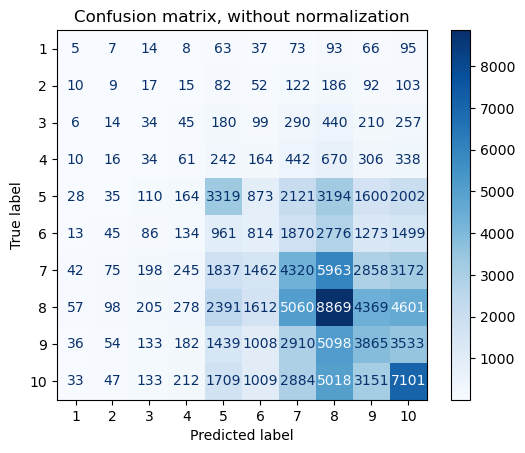

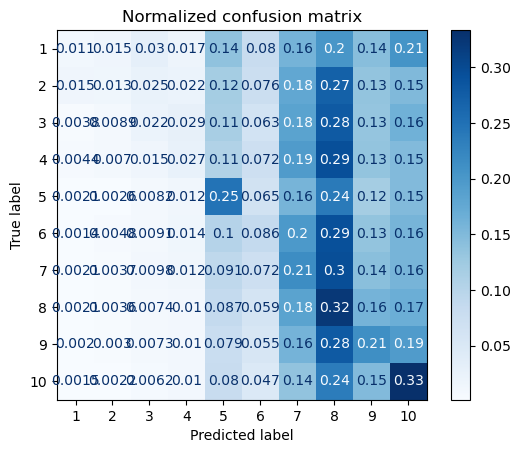

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Feature Importances

In [22]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.409535
0,isbn13,0.324991
1,normalized_year_of_publication,0.190453
61,state_other,0.004056
9,publisher_other,0.003480
...,...,...
27,country_brazil,0.000259
56,state_nordrhein-westfalen,0.000202
29,country_china,0.000190
24,country_argentina,0.000116


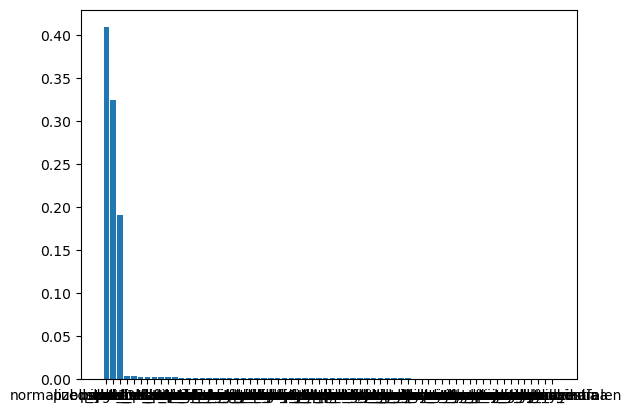

In [23]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [24]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
44,country_usa,0.001673
37,country_other,0.001400
43,country_united_kingdom,0.001151
28,country_canada,0.001039
31,country_germany,0.000758
25,country_australia,0.000586
34,country_malaysia,0.000575
30,country_france,0.000556
36,country_new_zealand,0.000541
40,country_spain,0.000540


In [25]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
61,state_other,0.004056
47,state_california,0.002473
55,state_new_york,0.001996
63,state_texas,0.001965
50,state_illinois,0.001746
52,state_michigan,0.001730
60,state_oregon,0.001636
62,state_pennsylvania,0.001629
49,state_florida,0.001626
51,state_massachusetts,0.001614


In [26]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
9,publisher_other,0.003480
2,publisher_ballantine_books,0.002303
12,publisher_pocket,0.002090
21,publisher_warner_books,0.001978
3,publisher_bantam_books,0.001818
15,publisher_signet_book,0.001672
10,publisher_penguin_books,0.001583
7,publisher_harpercollins,0.001528
17,publisher_simon_&amp;_schuster,0.001482
4,publisher_berkley_publishing_group,0.001406


In [27]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.409535
Name: Importances, dtype: float64
country_importance: 0.012424433256148093
state_importance: 0.032569609146138975
publisher_importance: 0.030027956886993095
